In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train_df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [7]:
train_df['Age'] = train_df['Age'].fillna(np.mean(train_df['Age']))
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train_df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [10]:
train_df.drop(['Cabin'], axis=1, inplace=True)

In [11]:
train_df.dropna(inplace=True)
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [13]:
train_df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [14]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

# 1. Encoding

In [15]:
encoder = LabelEncoder()

In [16]:
train_df['Sex'] = encoder.fit_transform(train_df['Sex'])
train_df['Embarked'] = encoder.fit_transform(train_df['Embarked'])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


# 2. Features and Target

In [17]:
features = train_df.drop(['Survived'], axis=1)

In [18]:
target = train_df['Survived']

In [19]:
X_train, X_val, Y_train, Y_val =  train_test_split(features, target, train_size=0.70)

# 3. ML model - Training and Prediction

In [20]:
dt_model = DecisionTreeClassifier()

In [21]:
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [22]:
result = dt_model.predict(X_val)
print(result)

[0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1
 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0
 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1
 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0
 0 1 0 1 0 1 0 0]


In [23]:
print(np.array(Y_val))

[0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1
 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1
 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1
 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0
 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0
 0 1 0 1 0 1 0 0]


In [24]:
metrics.accuracy_score(np.array(Y_val), result)

0.7340823970037453

In [25]:
metrics.f1_score(np.array(Y_val), result)

0.6635071090047393

In [26]:
metrics.confusion_matrix(np.array(Y_val), result)

array([[126,  42],
       [ 29,  70]])

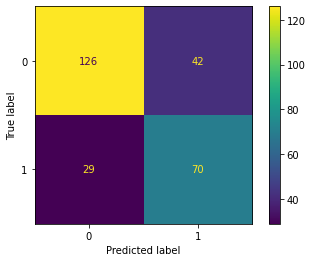

In [27]:
metrics.plot_confusion_matrix(dt_model, X_val, Y_val)

# 4. Random Forest

In [28]:
rd_model = RandomForestClassifier(random_state=123)

In [29]:
rd_model_hyp = RandomForestClassifier(n_estimators=50, max_depth=8, criterion='gini')

In [30]:
# Grid Search tuning
params = {"n_estimators": [15, 20, 25, 30, 35, 40, 45,50], 
          "max_depth": [5, 6, 7, 8, 9, 10, 15, 20]}

In [31]:
gd_model = GridSearchCV(rd_model, param_grid=params, n_jobs=-1, cv=3)

In [32]:
gd_model.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 15, 20],
                         'n_estimators': [15, 20, 25, 30, 35, 40, 45, 50]})

In [33]:
# Getting the best model parameters
gd_model.best_params_

{'max_depth': 5, 'n_estimators': 20}

In [34]:
rd_model_hyp = RandomForestClassifier(n_estimators=20, max_depth=5, criterion='gini')

In [35]:
rd_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=123)

In [36]:
result1 = rd_model.predict(X_val)
print(result1)

[0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1
 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0
 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0
 0 1 0 1 0 1 0 0]


In [37]:
print(np.array(Y_val))

[0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1
 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1
 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1
 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0
 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0
 0 1 0 1 0 1 0 0]


In [38]:
metrics.accuracy_score(np.array(Y_val), result1)

0.8202247191011236

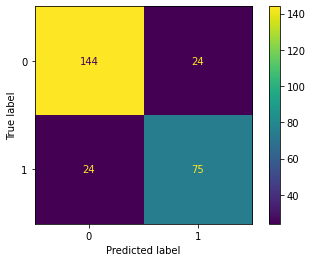

In [39]:
metrics.plot_confusion_matrix(rd_model, X_val, Y_val)

In [40]:
rd_model_hyp.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, n_estimators=20)

In [41]:
result2 = rd_model_hyp.predict(X_val)
print(result2)

[0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0
 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0
 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0
 0 1 0 1 0 1 0 0]


In [42]:
print(np.array(Y_val))

[0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1
 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1
 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1
 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0
 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0
 0 1 0 1 0 1 0 0]


In [43]:
metrics.accuracy_score(np.array(Y_val), result2)

0.850187265917603

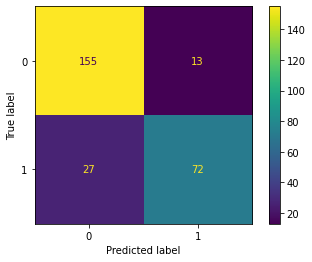

In [44]:
metrics.plot_confusion_matrix(rd_model_hyp, X_val, Y_val)